In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

from IPython.display import display_html

# E-Sports Earnings
En este dataset aparecen las ganancias monetarias en torneos de diferentes videojuegos desde su lanzamiento hasta la actualidad, el dataset ha sido extraido mediante web scrap de la página [E-Sports Earnings](https://www.esportsearnings.com/games/browse-by-genre) y subido a [Kaggle](https://www.kaggle.com/datasets/rushikeshhiray/esport-earnings) por un usuario que no soy yo.

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
archivo = "./datasets/ESport_Earnings.csv"

In [4]:
df = pd.read_csv(archivo, index_col=0)

# Vistazo inicial a los datos

In [5]:
print("Columnas: " + ", ".join(list(df.columns)))

Columnas: TotalMoney, GameName, Genre, PlayerNo, TournamentNo, Top_Country, Top_Country_Earnings, Releaseyear


**Explicación de las columnas**
* TotalMoney: Dinero total ganado en torneos($)
* GameName: Nombre del juego
* Genre: Género del juego
* PlayerNo: Número de jugadores en torneos
* TournamentNo: Número de torneos
* Top_Country: País con mayor ganancia
* Top_Country_Earnings: Ganancia del país con más ganancias($)
* Releaseyear: Año de salida del juego


In [6]:
df.sample(5)

,TotalMoney,GameName,Genre,PlayerNo,TournamentNo,Top_Country,Top_Country_Earnings,Releaseyear
IdNo,,,,,,,,
264,420331.47,Call of Duty 4: Modern Warfare,First-Person Shooter,422,86,United Kingdom,104318.64,2007
481,0.00,Pok�mon TGC,Strategy,0,0,None,0.00,1996
537,0.00,Battalion 1944,First-Person Shooter,0,0,None,0.00,2018
234,25000.00,Pro Evolution Soccer 3,Sports,8,2,France,10000.00,2003
420,1994.00,Nitroplus Blasterz: Heroines Infinite Duel,Fighting Game,10,4,United States,1718.00,2015


In [7]:
df.shape

(504, 8)

In [8]:
#Método visto en: https://www.kaggle.com/code/rohan1506?scriptVersionId=90101986&cellId=9
dfDescribeNumerics = df.describe().style.set_table_attributes("style='display:inline'").set_caption("Numéricos")
dfDescribeObjects = df.describe(include="object").style.set_table_attributes("style='display:inline'").set_caption("No numéricos")

display_html(dfDescribeNumerics._repr_html_() + ("\xa0" * 15) + dfDescribeObjects._repr_html_(), raw=True)

Numéricos TotalMoney PlayerNo TournamentNo Top_Country_Earnings Releaseyear 
 
 count 
 504.000000 
 504.000000 
 504.000000 
 504.000000 
 504.000000 
 
 
 mean 
 1744743.421607 
 186.738095 
 80.746032 
 601082.308175 
 2006.982143 
 
 
 std 
 12691461.160529 
 795.779782 
 412.460699 
 3751800.002160 
 89.354220 
 
 
 min 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 11.000000 
 
 
 25% 
 1375.202500 
 4.000000 
 1.000000 
 391.300000 
 2006.000000 
 
 
 50% 
 36008.560000 
 20.000000 
 5.000000 
 17116.795000 
 2013.000000 
 
 
 75% 
 205751.552500 
 86.000000 
 25.250000 
 103603.875000 
 2017.000000 
 
 
 max 
 227419904.510000 
 13032.000000 
 5909.000000 
 65060611.470000 
 2020.000000 
 
                 No numéricos GameName Genre Top_Country 
 
 count 
 504 
 504 
 504 
 
 
 unique 
 503 
 11 
 33 
 
 
 top 
 Battalion 1944 
 Fighting Game 
 United States 
 
 
 freq 
 2 
 160 
 238

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 613 to 535
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TotalMoney            504 non-null    float64
 1   GameName              504 non-null    object 
 2   Genre                 504 non-null    object 
 3   PlayerNo              504 non-null    int64  
 4   TournamentNo          504 non-null    int64  
 5   Top_Country           504 non-null    object 
 6   Top_Country_Earnings  504 non-null    float64
 7   Releaseyear           504 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 35.4+ KB


# Tratamiento de los datos

In [10]:
#Guardo una copia del df
dfOriginal = df.copy()

In [11]:
duplicated = len(df[df.duplicated() == True])

print("Duplicados:", duplicated)

if duplicated > 0:
    df.drop_duplicates(inplace=True)

Duplicados: 0


In [12]:
e = len(df)
print("Nulos", "\n" + "-" * 30)
for i in df.columns:
    print(f"{i}: {(len((df[df[i].isnull() == True])) / e)*100:.2f}%")

Nulos 
------------------------------
TotalMoney: 0.00%
GameName: 0.00%
Genre: 0.00%
PlayerNo: 0.00%
TournamentNo: 0.00%
Top_Country: 0.00%
Top_Country_Earnings: 0.00%
Releaseyear: 0.00%


In [13]:
#Elimino espacios extra
for col in ['GameName', 'Genre', "Top_Country"]:
    df[col] = df[col].apply(lambda x: ' '.join(x.split()))

In [14]:
#Aseguro que todos los años son válidos poniendo como límites 1900 2100
df = df[(df["Releaseyear"] > 1900) & (df["Releaseyear"] < 2100)]


# Analisis de datos

In [15]:
#El campo "Releaseyear" lo pongo como categórico porque son años
columnasNumericas = ["TotalMoney", "PlayerNo", "TournamentNo", "Top_Country_Earnings"]
columnasCategoricas = ["GameName", "Genre", "Top_Country", "Releaseyear"]

## Columnas numéricas

### Distribución

In [16]:
#Creo un segundo dataframe quitando outliers, los elimino 5 veces porque con menos los datos siguen demasiado dispersos y con más quedan pocos datos
df_ = df.copy()

for i in range(len(columnasNumericas)):
    for _ in range(5):
        Q1 = df_[columnasNumericas[i]].quantile(0.25)
        Q3 = df_[columnasNumericas[i]].quantile(0.75)
        IQR = Q3 - Q1

        LI = (Q1 - 1.5 * IQR)
        LS = (Q3 + 1.5 * IQR)
        
        df_ = df_[(df_[columnasNumericas[i]] >= LI) & (df_[columnasNumericas[i]] <= LS)]

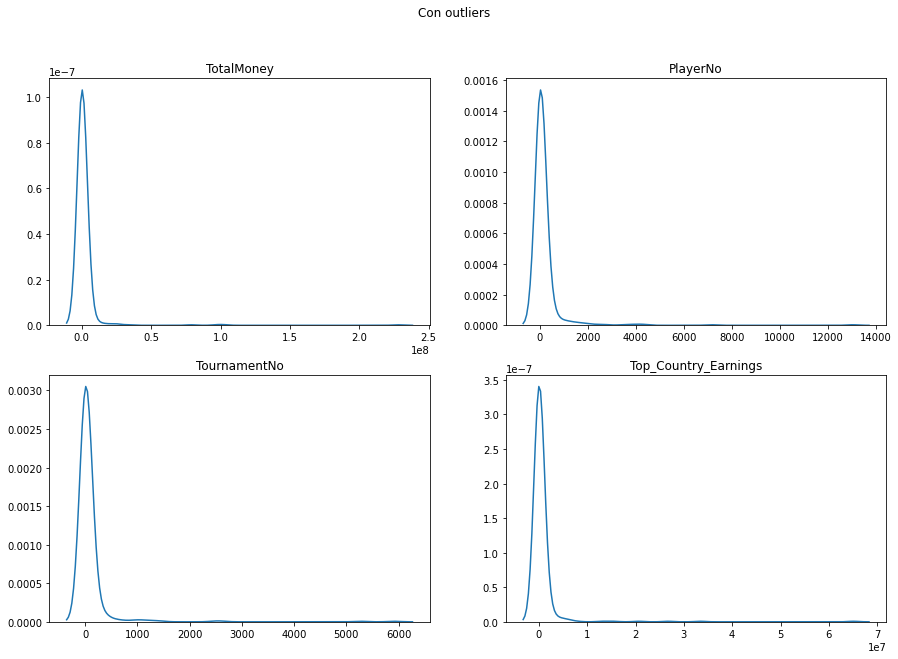

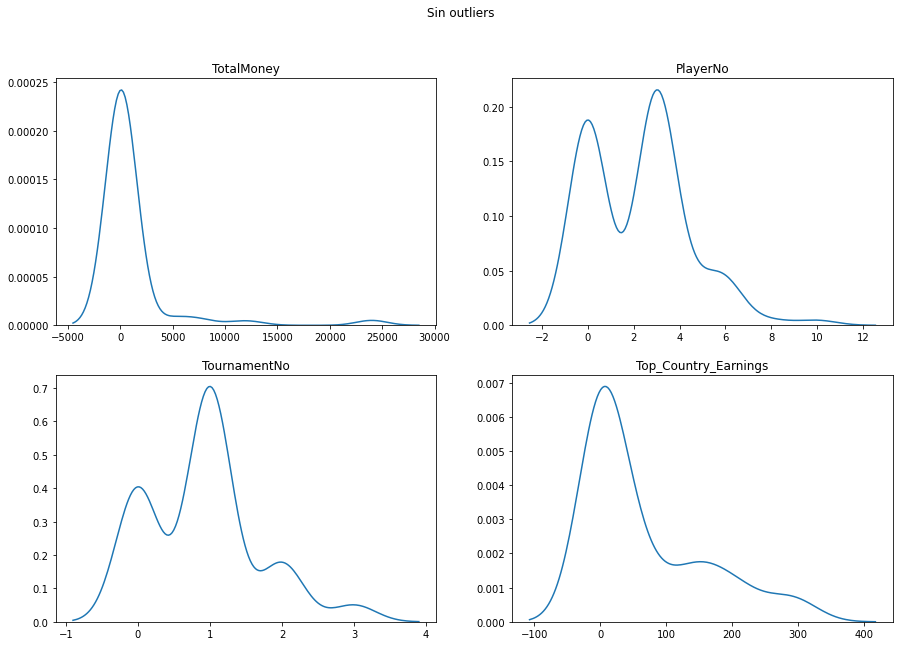

In [17]:
figure1, axes = plt.subplots(2,2, figsize=(15,10))

figure1.suptitle("Con outliers")

for i in range(0, len(columnasNumericas)):
    sns.kdeplot(ax=axes[((i+1 - i%2)//2)][i%2], data=df[columnasNumericas[i]])
    
    axes[((i+1 - i%2)//2)][i%2].set_xlabel(None)
    axes[((i+1 - i%2)//2)][i%2].set_ylabel(None)
    axes[((i+1 - i%2)//2)][i%2].set_title(columnasNumericas[i])

plt.show()

###################################################################################

figure2, axes = plt.subplots(2,2, figsize=(15,10))

figure2.suptitle("Sin outliers")


for i in range(0, len(columnasNumericas)):
    sns.kdeplot(ax=axes[((i+1 - i%2)//2)][i%2], data=df_[columnasNumericas[i]])
    
    axes[((i+1 - i%2)//2)][i%2].set_xlabel(None)
    axes[((i+1 - i%2)//2)][i%2].set_ylabel(None)
    axes[((i+1 - i%2)//2)][i%2].set_title(columnasNumericas[i])

plt.show()

La columna **TotalMoney** y la columna **Top_Country_Earnings** se adaptan a la gráfica **normal** una vez se han eliminado algunos outliers, sin quitarlos todas las columnas se adaptan

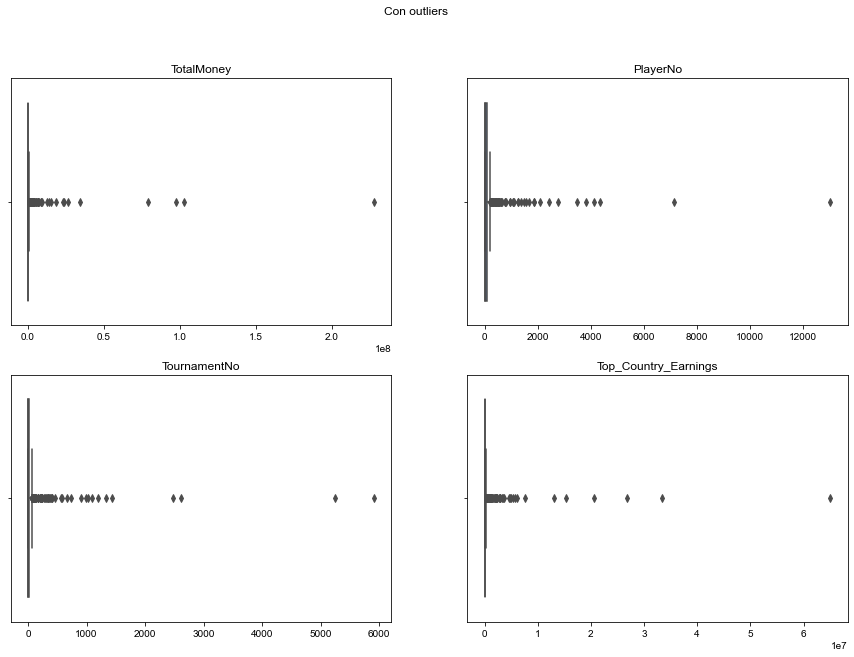

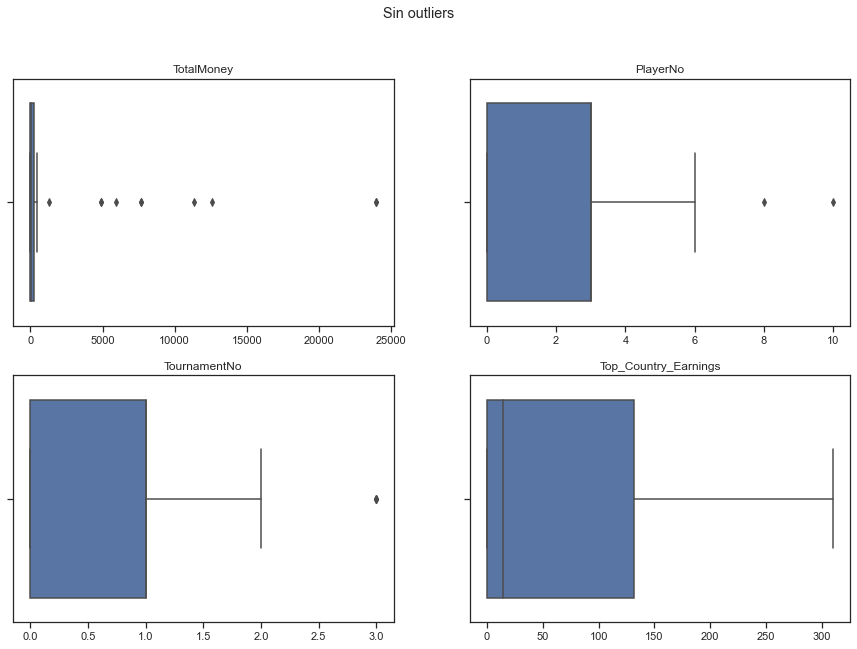

In [18]:
figure1, axes = plt.subplots(2,2, figsize=(15,10))

figure1.suptitle("Con outliers")

sns.set_theme(style="ticks")

for i in range(0, len(columnasNumericas)):
    sns.boxplot(x=df[columnasNumericas[i]], ax=axes[((i+1 - i%2)//2)][i%2], orient="h")
    
    axes[((i+1 - i%2)//2)][i%2].set_xlabel(None)
    axes[((i+1 - i%2)//2)][i%2].set_title(columnasNumericas[i])

#########################################################################################

figure2, axes = plt.subplots(2,2, figsize=(15,10))

figure2.suptitle("Sin outliers")

for i in range(0, len(columnasNumericas)):    
    sns.boxplot(x=df_[columnasNumericas[i]], ax=axes[((i+1 - i%2)//2)][i%2], orient="h")
    
    axes[((i+1 - i%2)//2)][i%2].set_xlabel(None)
    axes[((i+1 - i%2)//2)][i%2].set_title(columnasNumericas[i])


Los datos están muy dispersos y por ello aparecen tantos outliers en ellos pero se puede apreciar que la mayoria se encuentran cerca del 0

### Relación

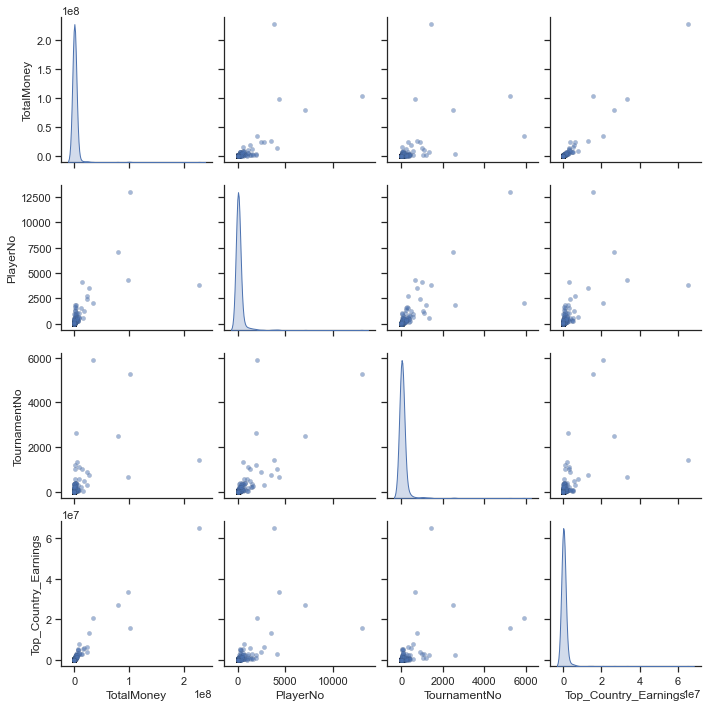

In [19]:
sns.pairplot(data=df, vars=columnasNumericas, diag_kind='kde', plot_kws=dict(s=20, edgecolor="k", linewidth=0.1, alpha=0.5), diag_kws=dict(shade=True))
plt.show()

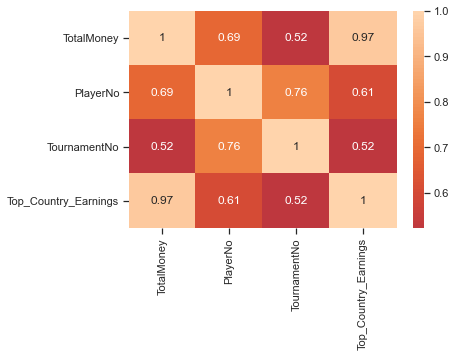

In [20]:
sns.heatmap(df[columnasNumericas].corr(), annot = True, center = 0)
plt.show()

**Insights**
* Todas las columnas numéricas se correlacionan considerablemente entre ellas
* Cuánto más dinero se ha ganado en un juego más dinero gana el país con mayores ganancias
* Cuanto mayor es el número de jugadores suele haber mayor número de torneos y más dinero

## Columnas categóricas

### Distribución

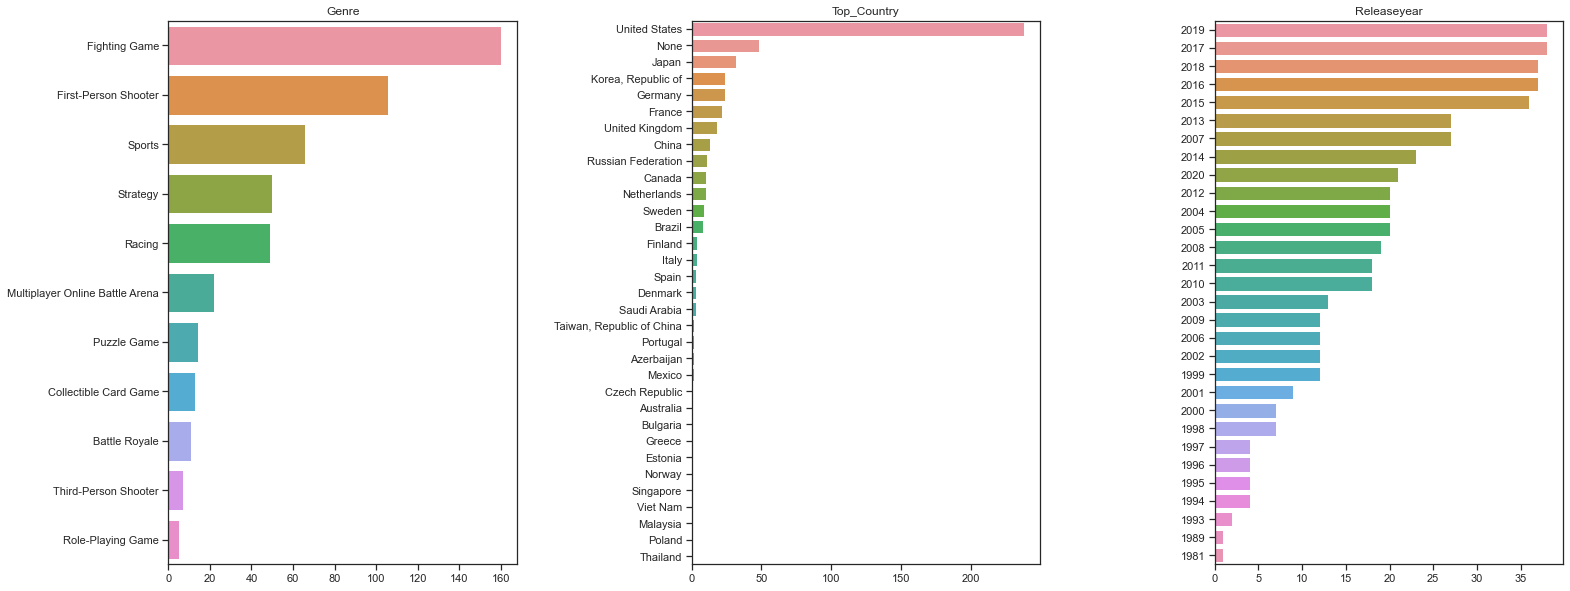

In [21]:
figure, axes = plt.subplots(1,3, figsize=(25,10))
plt.subplots_adjust(wspace=0.5)

sns.set_theme(style="ticks")

#Ignoro la columna de los juegos porque cada juego es una entrada
for i in range(1, len(columnasCategoricas)):
    sns.countplot(y=df[columnasCategoricas[i]], ax=axes[i-1], order=df[columnasCategoricas[i]].value_counts().index)
    
    axes[i-1].set_ylabel(None)
    axes[i-1].set_xlabel(None)
    axes[i-1].set_title(columnasCategoricas[i])

**Insights**
* Los juegos de lucha son el género más popular entre los juegos de E-Sports
* Estados unidos es el país que lidera en mayor número de juegos

### Relación

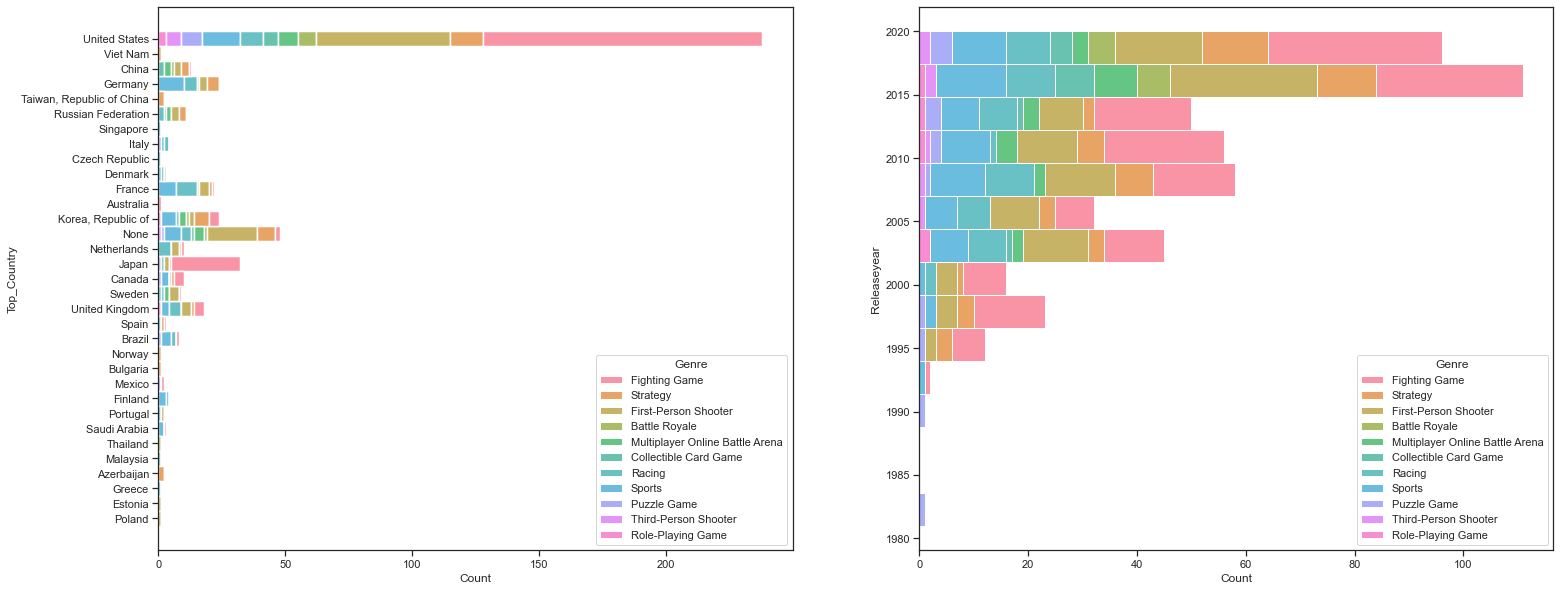

In [22]:
figure1, axes = plt.subplots(1,2, figsize=(25,10))

sns.histplot(y="Top_Country", hue="Genre", data=df, ax=axes[0], multiple="stack")
sns.histplot(y="Releaseyear", hue="Genre", data=df, ax=axes[1], multiple="stack")

plt.show()

**Insights**
* Desde 1995 todos los años ha aumentado la variedad de géneros de videojuegos que salen

# Columnas categóricas y numéricas

<ipython-input-23-61e567276d5f>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(("{:,.2f}".format(i) for i in g.get_xticks()/1000), rotation=45)
<ipython-input-23-61e567276d5f>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(("{:,.2f}".format(i) for i in g.get_xticks()/1000), rotation=45)
<ipython-input-23-61e567276d5f>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(("{:,.2f}".format(i) for i in g.get_xticks()/1000), rotation=45)
<ipython-input-23-61e567276d5f>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(("{:,.2f}".format(i) for i in g.get_xticks()/1000), rotation=45)
<ipython-input-23-61e567276d5f>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(("{:,.2f}".format(i) for i in g.get_xticks()/1000), rotation=45)
<ipython-input-23-61e

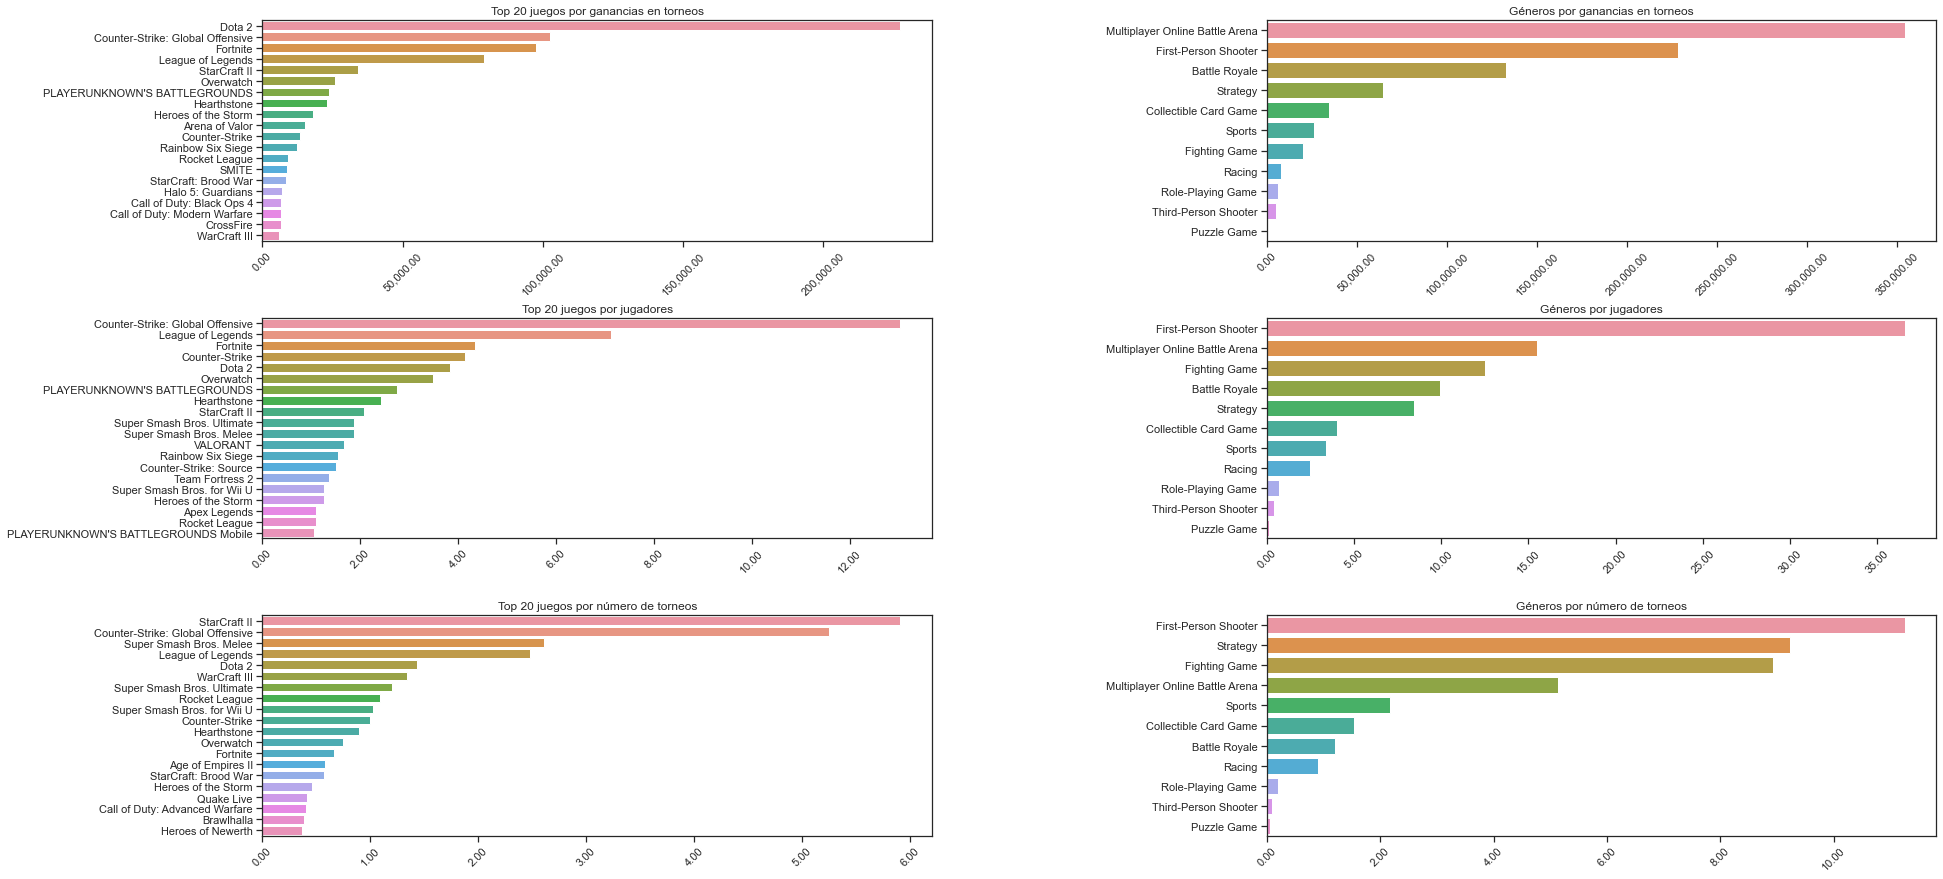

In [23]:
#Las graficas que muestran los juegos he decidido hacerlos con los 20 mejores debido al gran número de datos diferentes de la columna "GameName"
figure1, axes = plt.subplots(3,2, figsize=(30,15))
plt.subplots_adjust(wspace=0.5, hspace=0.35)

#Fila 1
axes[0][0].set_title("Top 20 juegos por ganancias en torneos")
g = sns.barplot(y="GameName", x="TotalMoney", data=df.sort_values(by="TotalMoney")[-1:-21:-1], ax=axes[0][0])
g.set_xticklabels(("{:,.2f}".format(i) for i in g.get_xticks()/1000), rotation=45)
axes[0][0].set_ylabel(None)
axes[0][0].set_xlabel(None)

axes[0][1].set_title("Géneros por ganancias en torneos")
g = sns.barplot(y="Genre", x="TotalMoney", data=df.groupby("Genre", as_index=False).sum().sort_values(by="TotalMoney")[::-1], ax=axes[0][1])
g.set_xticklabels(("{:,.2f}".format(i) for i in g.get_xticks()/1000), rotation=45)
axes[0][1].set_ylabel(None)
axes[0][1].set_xlabel(None)


#Fila 2
axes[1][0].set_title("Top 20 juegos por jugadores")
g = sns.barplot(y="GameName", x="PlayerNo", data=df.sort_values(by="PlayerNo")[-1:-21:-1], ax=axes[1][0])
g.set_xticklabels(("{:,.2f}".format(i) for i in g.get_xticks()/1000), rotation=45)
axes[1][0].set_ylabel(None)
axes[1][0].set_xlabel(None)

axes[1][1].set_title("Géneros por jugadores")
g = sns.barplot(y="Genre", x="PlayerNo", data=df.groupby("Genre", as_index=False).sum().sort_values(by="PlayerNo")[::-1], ax=axes[1][1])
g.set_xticklabels(("{:,.2f}".format(i) for i in g.get_xticks()/1000), rotation=45)
axes[1][1].set_ylabel(None)
axes[1][1].set_xlabel(None)


#Fila 3
axes[2][0].set_title("Top 20 juegos por número de torneos")
g = sns.barplot(y="GameName", x="TournamentNo", data=df.sort_values(by="TournamentNo")[-1:-21:-1], ax=axes[2][0])
g.set_xticklabels(("{:,.2f}".format(i) for i in g.get_xticks()/1000), rotation=45)
axes[2][0].set_ylabel(None)
axes[2][0].set_xlabel(None)

axes[2][1].set_title("Géneros por número de torneos")
g = sns.barplot(y="Genre", x="TournamentNo", data=df.groupby("Genre", as_index=False).sum().sort_values(by="TournamentNo")[::-1], ax=axes[2][1])
g.set_xticklabels(("{:,.2f}".format(i) for i in g.get_xticks()/1000), rotation=45)
axes[2][1].set_ylabel(None)
axes[2][1].set_xlabel(None)

plt.show()

**Insights**
* El juego con más dinero en premios es **Dota 2** de género **MOBA** que también es el primero por ganancias
* El juego con más jugadores es **CS:GO** de género **FPS** que también es el primero por número de jugadores
* El juego con más torneos es **StartCraft II** de género **Estrategia** que es el segundo por número de torneos, el primero es **FPS**